# DPPN: Deep Progression Predictor in NMIBC
### Sub-title: A procedure of training and test of prediction model for non-muscle-invasive bladder cancer (NMIBC) progression
#### Description: The following script describes a procedure to develop a predictive model for accurately predicting disease progression in NMIBC using transcriptomic data from NMIBC patients.

### Step 1. Loading packages
>#### Please load all the necessary packages for the training process. Execute the code below by pressing CTRL + Enter. If any of the packages are not installed, use the 'conda install' or 'pip install' command to install them.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

### Step 2. Loading transcriptome data
>#### 1) Please load the transcriptome data for training the predictive model and measuring performance.
>#### 2) In this example, data from the CBNU cohort (n=103) is used for training, and data from the UROMOL cohort (n=476) is used for performance measurement. We have 1,789 prognostic genes extracted from the training data, and we extracted the expression data of 1,205 genes from the performance measurement data.
>#### 3) The data from the CBNU cohort was divided into a train set and a validation set in a 7:3 ratio to be utilized as validation data in the training process of the deep learning model.
>#### Execute the code below by pressing CTRL + Enter.

In [7]:
data = np.genfromtxt("merged.q_norm.PFS_g1789.overlapped_g1205.T.txt")

x_cbnu = data[0:103,0:1205]
y_cbnu = data[0:103,1205]

x_uromol = data[103:,0:1205]
y_uromol = data[103:,1205]

# Spliting TRINING, VALIDATION sets of data from the CBNU cohort
x_train, x_val, y_train, y_val = train_test_split(x_cbnu, y_cbnu, test_size=0.3)

print("#n of samples in train set:",len(y_train))
print("#n of samples in validation set:", len(y_val))

#n of samples in train set: 72
#n of samples in validation set: 31


In [2]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(1500, input_dim=1205, activation='relu'))
model.add(Dense(1200, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
#4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=50)
hist = model.fit(x_train, y_train, epochs=300, batch_size=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/300
15/15 [==============================] - 1s 30ms/step - loss: 0.7496 - accuracy: 0.7083 - val_loss: 0.0687 - val_accuracy: 0.9677
Epoch 2/300
15/15 [==============================] - 0s 22ms/step - loss: 0.0951 - accuracy: 0.9861 - val_loss: 0.0374 - val_accuracy: 0.9677
Epoch 3/300
15/15 [==============================] - 0s 23ms/step - loss: 3.4455e-04 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9677
Epoch 4/300
15/15 [==============================] - 0s 23ms/step - loss: 1.0081e-04 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9677
Epoch 5/300
15/15 [==============================] - 0s 25ms/step - loss: 5.4823e-05 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9677
Epoch 6/300
15/15 [==============================] - 0s 24ms/step - loss: 3.2786e-05 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9677
Epoch 7/300
15/15 [==============================] - 0s 24ms/step - loss: 2.0828e-05 - accuracy: 1.0000 - val_loss: 0.0599 - val_acc

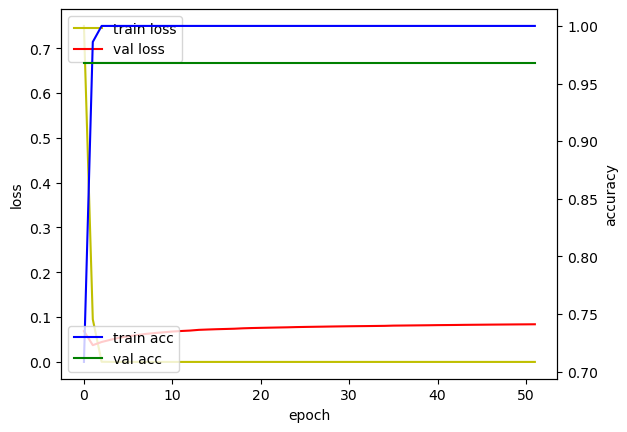

In [4]:
#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [5]:
#prediction model handling
from keras.models import load_model

#prediction model 저장
model.save("NMIBC_progression_risk_predictor.h5")

#prediction model 로딩
model = load_model("NMIBC_progression_risk_predictor.h5")

y_predProp = model.predict(x_uromol)
y_predicted = np.where(y_predProp > 0.5, 1, 0)

# 모델 사용하기
for i in range(0, len(y_predicted)):
    print("Real-val: " + str(y_uromol[i]) + ", Predict: " + str(y_predicted[i]))

# 모델 평가하기
loss_and_metircs = model.evaluate(x_uromol, y_uromol, batch_size=32)
print('')
print('loss: ' + str(loss_and_metircs[0]))
print('acc: ' + str(loss_and_metircs[1]))

#예측 결과 저장하기
fHnd = open("predicted_class_result.UROMOL.txt","w")
for i in range(0, len(y_predicted)):
    fHnd.write(str(i+1) + "\t" + str(y_predicted[i]) + "\n")
fHnd.close()

C:\Users\Seon-Kyu\.conda\envs\DPPN\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 0s 5ms/step
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [0]
Real-val: 1.0, Predict: [1]
Real-val: 1.0, Predict:

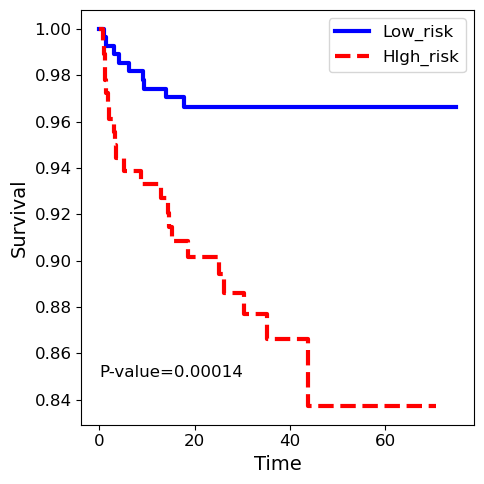

In [6]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

pfs_data_uromol = np.genfromtxt("PFS_data.UROMOL.txt")
pfs_m = pfs_data_uromol[1,1:]
pfs = pfs_data_uromol[2,1:]

labels = ['Low_risk', 'HIgh_risk']
groups = []
for risk_group in y_predicted:
    groups.append(int(risk_group[0])+1)
events = pfs
times  = pfs_m

#### 2. 데이터 전처리
E = np.array(events, dtype=np.int32)
T = np.array(times, dtype=np.float32)

#### 3. matplotlib 설정
rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(5,5))
styles = ['-', '--']
colors = ['b', 'r']
lw = 3

#### 4. Kaplan-Meier 그리기
kmf = KaplanMeierFitter()
for i, label in enumerate(labels):
    ix = np.array(groups) == (i+1)
    kmf.fit(T[ix], event_observed=E[ix], label=labels[i])
    kmf.plot(ax=ax, ci_show=False, linewidth=lw, style=styles[i], c=colors[i])

#### 5. Logrank 검정
ix = np.array(groups) == 2
result = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99)
pvalue = result.p_value
ax.text(0.1, 0.85,'P-value=%.5f'% pvalue) # 위치(x,y) 수동으로 지정필요

#### 6. 그래프 세부설정
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Survival', fontsize=14)
ax.legend(loc='upper right')

#### 7. 그래프 저장하고 출력하기
plt.tight_layout()
plt.savefig('ex_kmplot.png', format='png', dpi=300)
plt.show()